### Apply fracture detection algorithms to a batch of signals

In [158]:
# imports libraries
import os
import sys
import imp
import glob

import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import pandas as pd
from __future__ import division

%matplotlib inline 

In [159]:
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display

In [160]:
# Grabs the preprocessing and automatic_sync files
sys.path.append(os.path.join(os.pardir,'pythonCode'))

In [161]:
import preprocessing as pp
import automatic_sync as autoS
imp.reload(autoS)

<module 'automatic_sync' from '../pythonCode/automatic_sync.py'>

In [162]:
import fracture_prediction as predict
imp.reload(predict)

<module 'fracture_prediction' from '../pythonCode/fracture_prediction.py'>

In [163]:
import detection as detect

In [164]:
# reading the data

rawDataPath = os.path.join(os.pardir,'rawAudio')
files = glob.glob(os.path.join(rawDataPath,'*.wav'))
names = []
        
for name in files:
    fileName = os.path.basename(name).split(".")[0]
    names.append(fileName)

# Determines which cameras will be selected (['Bents'],['Camera Location'],['Motion #'])

filt = (None,None,['18']) # Selects the bent 1 cameras during motion 18

# Applies filter to camera names and returns only selected subset names
audioFiles = pp.getKeys(names,filt);

# Reads the .wav files from the list generted by getKeys
(names,cDataset) = pp.readWAV(rawDataPath,audioFiles)

Opening GP_B1_NL_18 ...
Opening GP_B1_NU_18 ...
Opening GP_B1_SL_18 ...
Opening GP_B1_SU_18 ...
Opening GP_B2_SL_18 ...
Opening GP_B2_SU_18 ...
Opening GP_B3_NL_18 ...
Opening GP_B3_NU_18 ...
Opening GP_B3_SL_18 ...
Opening GP_B3_SU_18 ...


In [165]:
## syncing the dataset
final_offsets, sDataset = autoS.sync_dataset(cDataset,'GP_B1_NL_18',names,mask=[0,1])

**Median-filter based fraction detection:**

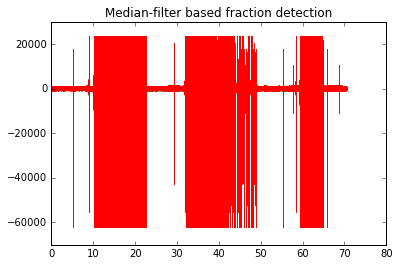

In [166]:
# extract fractures for each signal in the dataset (only the first channel)
fractureTimes = predict.applyFracturePredictor(sDataset, detect.med_filt)
plt.title('Median-filter based fraction detection')

**Spectrogram-based fracture detection:**

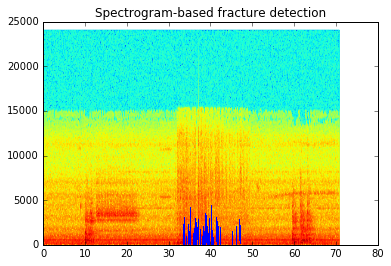

In [167]:
# extract fractures for each signal in the dataset (only the first channel)
fractureTimes = predict.applyFracturePredictor(sDataset, detect.spectrogram_ridges)
plt.title('Spectrogram-based fracture detection')

**Scaleogram-based fracture detection:**

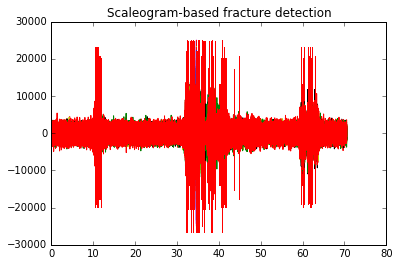

In [168]:
# extract fractures for each signal in the dataset (only the first channel)
fractureTimes = predict.applyFracturePredictor(sDataset, detect.cwt_ridges)
plt.title('Scaleogram-based fracture detection')

**Edge-based fracture detection:**

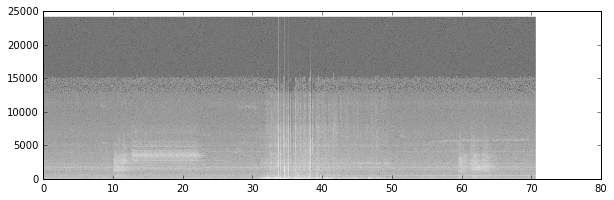

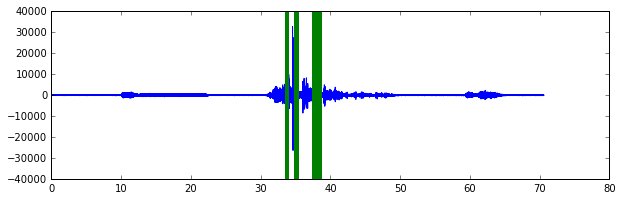

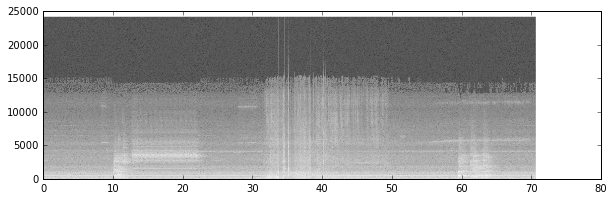

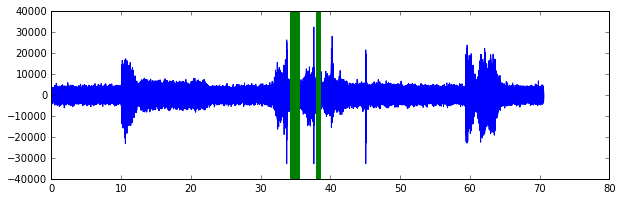

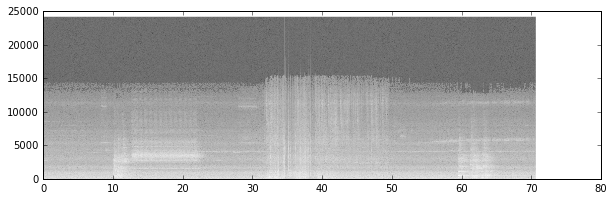

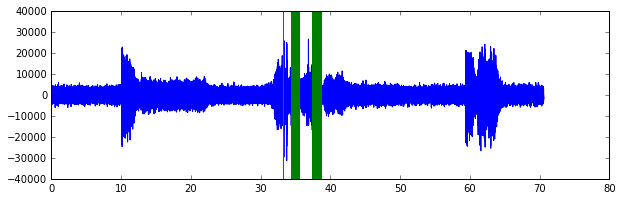

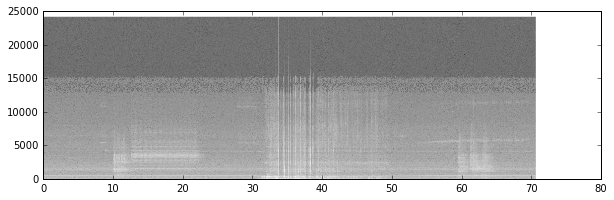

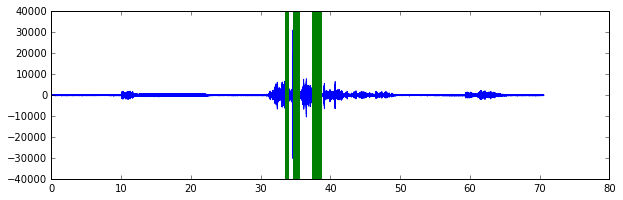

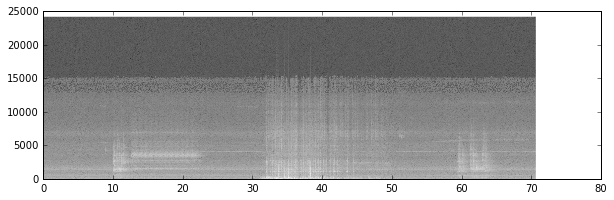

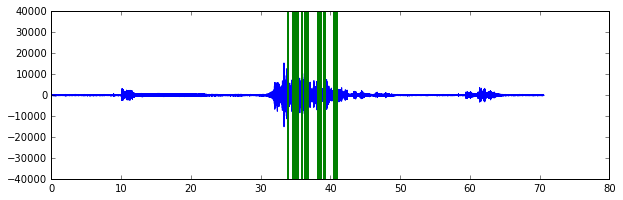

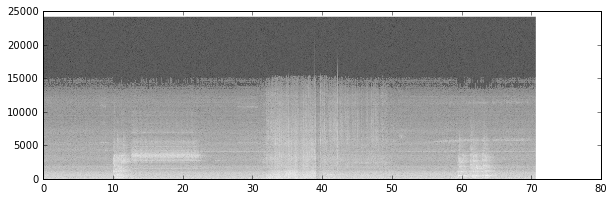

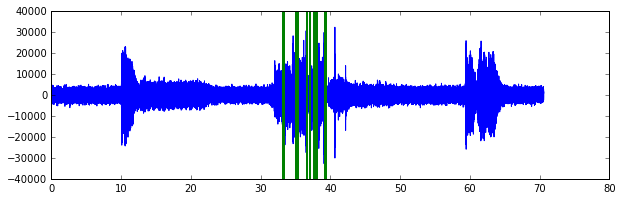

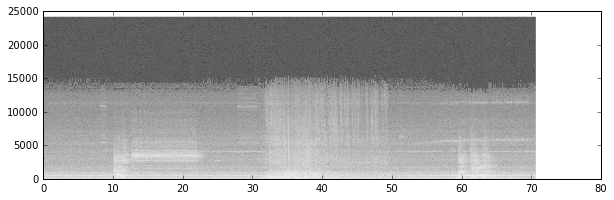

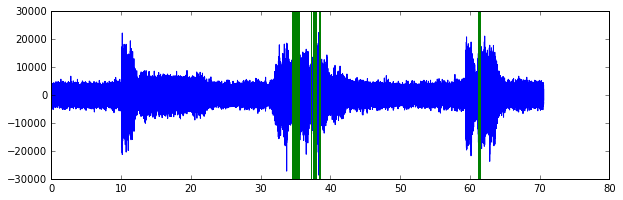

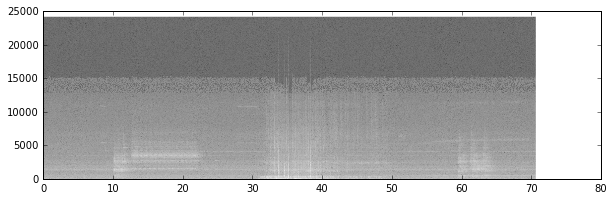

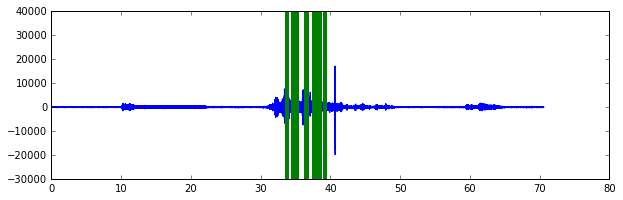

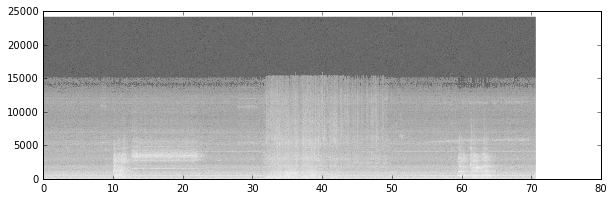

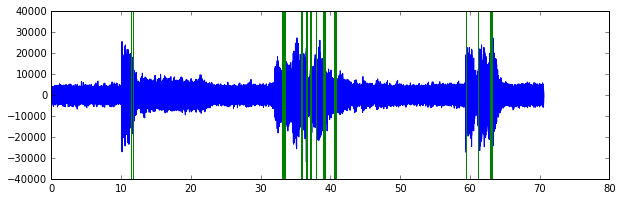

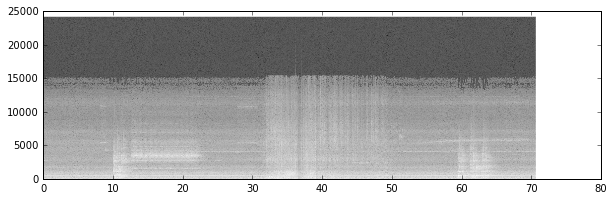

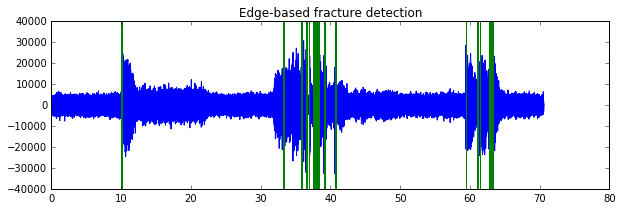

In [169]:
# extract fractures for each signal in the dataset (only the first channel)
fractureTimes = predict.applyFracturePredictor(sDataset, predict.edges2fractures, smoothing=5)
plt.title('Edge-based fracture detection')

In [170]:
# read Islam's estimates

import csv

csvPath = os.path.join(os.pardir,'IslamEstimates')
fileName = glob.glob(os.path.join(csvPath,'GP_B1_NL_18.csv'))

fractInd = list(csv.reader(open(fileName[0], 'rt'), delimiter=','))
fractInd = np.array([float(i[0]) for i in fractInd]) # in counts

fractIM = 1/48000*(-final_offsets['GP_B1_NL_18'] + fractInd)

['B1', 'B1', 'B3', 'B1', 'B2', 'B3', 'B2', 'B3', 'B1', 'B3']


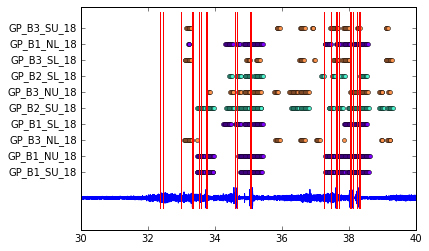

In [171]:
# Display the estimates
imp.reload(predict)
predict.displayFractureEstimates(fractureTimes, fractIM, signal=sDataset['GP_B1_NL_18'][:,0])

In [172]:
# Calculate the dissimilarity measure
d = {}
for key in fractureTimes.keys():
    d[key] = (predict.dissimilarity(fractureTimes[key],fractIM,0.1,1.,'distance'))

In [173]:
error = sum(d.values())

In [174]:
print('The total dissimilarity measure '+str(round(error,2))+'.')

The total dissimilarity measure 386.35.


** Interactively select the fracture detector:**

In [175]:
def wrapper_prediction(option):
    methods = {'Edges':predict.edges2fractures,'Filtering':detect.med_filt,'Spectrogram':detect.spectrogram_ridges,'Scaleogram':detect.cwt_ridges}
    methods[option.value]
    
    # predict fractures
    fractureTimes = predict.applyFracturePredictor(sDataset, methods[option.value])
    
    # display the fractures
    predict.displayFractureEstimates(fractureTimes, fractIM, signal=sDataset['GP_B1_NL_18'][:,0])
    
    # calculate the dissimilarity measure
    d = {}
    for key in fractureTimes.keys():
        d[key] = (predict.dissimilarity(fractureTimes[key],fractIM,0.1,1.,'distance'))
        return(fractureTimes)
    error = sum(d.values())
    print('The total dissimilarity measure '+str(round(error,2))+'.')

In [176]:
type_selector = widgets.Dropdown(
    options=['Filtering','Edges','Spectrogram','Scaleogram'],
    value='Filtering',
    description='Select the fracture detector:',
)
display(type_selector)

['B1', 'B1', 'B3', 'B1', 'B2', 'B3', 'B2', 'B3', 'B1', 'B3']


{'GP_B1_NL_18': array([ 10.05654464,  10.11904465,  10.16583634,  10.23952386,
         10.2824197 ,  10.35891973,  10.39000307,  10.46454476,
         10.56041978,  10.59637813,  10.65610731,  10.72387817,
         10.77831568,  10.8226907 ,  10.9342324 ,  10.99702408,
         11.01087825,  11.07466994,  11.13560745,  11.24423249,
         11.25391999,  11.32648251,  11.41923254,  11.47673256,
         11.51796173,  11.60987843,  11.64564927,  11.73206596,
         11.77852431,  11.84152433,  11.92344102,  11.9673577 ,
         12.00679521,  12.06862856,  12.17708693,  12.24310778,
         12.27104529,  12.32033697,  12.419212  ,  12.45362868,
         12.53777454,  12.58764955,  12.66954541,  12.73871209,
         12.77204544,  12.83925379,  12.93479549,  12.98475383,
         13.00110801,  13.0804622 ,  13.14017055,  13.22935807,
         13.29650393,  13.37404562,  13.40383729,  13.46802481,
         13.52685816,  13.57239984,  13.65689987,  13.70619155,
         13.7633999 ,  13

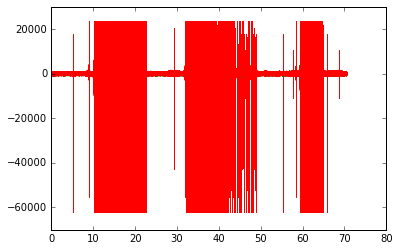

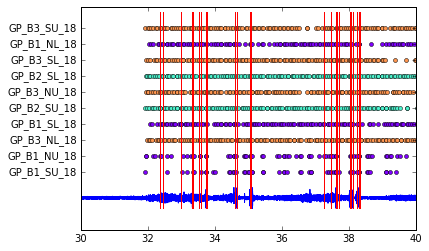

In [177]:
wrapper_prediction(type_selector)